In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import csv
import pandas as pd
import numpy as np
import matplotlib.ticker as plticker
import cv2

In [2]:
df = pd.read_csv('../data.csv')
df

,ImageLOC,ROI,Classes
0,./../ResizedJPEGImages/0.jpg,[[ 82 126 324 290] [ 92 1 348 157]],[cat chair]
1,./../ResizedJPEGImages/1.jpg,[[339 39 399 209] [111 130 263 385] [ 14 20...,[tvmonitor person chair]
2,./../ResizedJPEGImages/2.jpg,[[ 92 212 401 416] [ 52 79 158 389] [125 12...,[horse person person person horse]
3,./../ResizedJPEGImages/3.jpg,[[ 44 163 406 396]],[bus]
4,./../ResizedJPEGImages/4.jpg,[[201 147 234 250] [ 93 217 157 357] [ 47 13...,[person person car car]
5,./../ResizedJPEGImages/5.jpg,[[133 174 205 397] [166 150 344 335]],[bird bird]
6,./../ResizedJPEGImages/6.jpg,[[ 77 67 370 392] [151 62 240 250]],[horse person]
7,./../ResizedJPEGImages/7.jpg,[[305 247 371 313] [ 12 294 291 416] [ 57 33...,[sofa diningtable chair chair chair chair chai...
8,./../ResizedJPEGImages/8.jpg,[[210 145 242 292] [197 104 259 235]],[horse person]
9,./../ResizedJPEGImages/9.jpg,[[177 159 310 234]],[train]


In [3]:
def convert_numpy():
    a = df['ROI'][:]
    for i in range(df['ROI'].shape[0]):   
        b = a[i].replace('[', '')
        b = b.replace(']', '')
        b = np.fromstring(b, dtype=int, sep=' ')
        l = len(b)
        l = l/4
        b = np.split(b, l)
        b = np.asarray(b)
        df['ROI'][i] = b

    
convert_numpy()

In [4]:
def convert_class(df_):
    for i in range(df['Classes'].shape[0]):
        cls = []
        cls_ = df['Classes'][i]
        cls_ = cls_.replace('[', '')
        cls_ = cls_.replace(']', '')
        cls = cls_.split(' ')
        df['Classes'][i] = cls

convert_class(df)

In [5]:
img_loc = df['ImageLOC'][:]
roi = df['ROI'][:]
cls = df['Classes'][:]

['cat', 'chair']
82 126 324 290
92 1 348 157


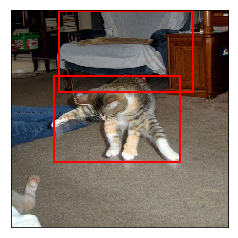

(416, 416, 3)
['tvmonitor', 'person', 'chair']
339 39 399 209
111 130 263 385
14 203 177 416


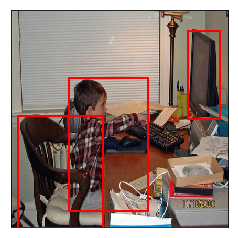

(416, 416, 3)
['horse', 'person', 'person', 'person', 'horse']
92 212 401 416
52 79 158 389
125 123 187 239
154 82 292 408
93 195 196 414


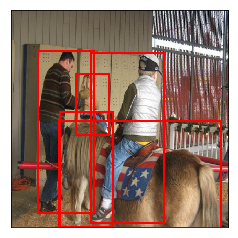

(416, 416, 3)
['bus']
44 163 406 396


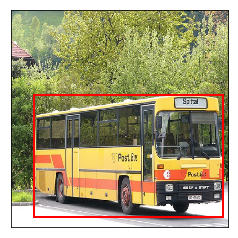

(416, 416, 3)
['person', 'person', 'car', 'car']
201 147 234 250
93 217 157 357
47 138 158 239
106 204 207 267


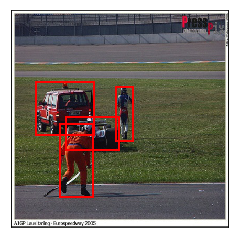

(416, 416, 3)
['bird', 'bird']
133 174 205 397
166 150 344 335


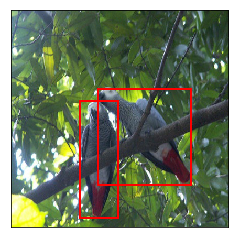

(416, 416, 3)
['horse', 'person']
77 67 370 392
151 62 240 250


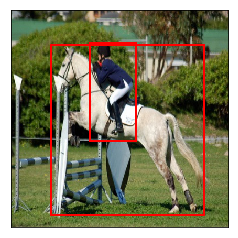

(416, 416, 3)
['sofa', 'diningtable', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair\n', 'chair']
305 247 371 313
12 294 291 416
57 331 106 378
128 306 159 346
166 293 192 326
243 283 278 307
251 302 290 416
183 326 257 416
194 348 234 415


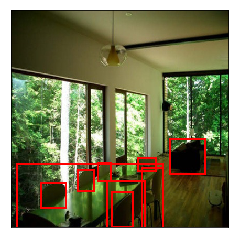

(416, 416, 3)
['horse', 'person']
210 145 242 292
197 104 259 235


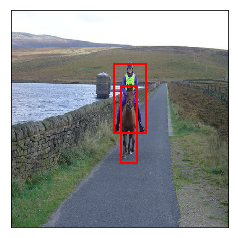

(416, 416, 3)
['train']
177 159 310 234


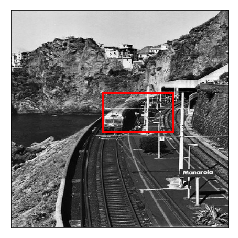

(416, 416, 3)
['motorbike', 'person', 'person', 'motorbike', 'person']
212 81 416 337
206 54 309 314
236 24 349 301
15 306 42 360
10 287 42 360


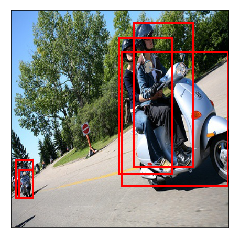

(416, 416, 3)
['aeroplane']
2 45 416 415


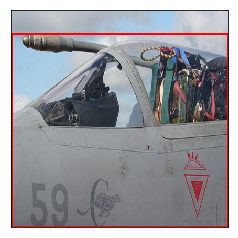

(416, 416, 3)
['aeroplane', 'aeroplane']
155 169 249 316
51 142 149 287


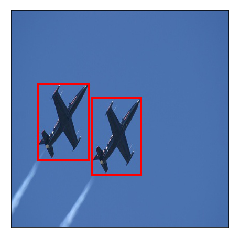

(416, 416, 3)
['train', 'car']
60 46 413 308
1 197 48 220


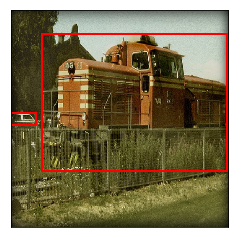

(416, 416, 3)
['bottle', 'bottle']
166 1 221 142
337 1 416 252


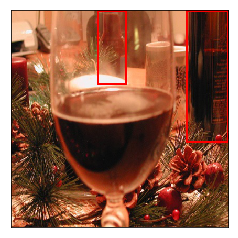

(416, 416, 3)
['person', 'person']
4 91 234 414
230 91 416 414


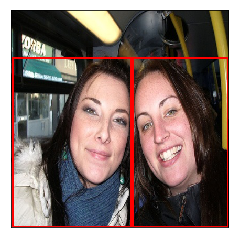

(416, 416, 3)
['car']
54 78 372 357


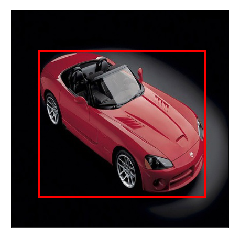

(416, 416, 3)
['person', 'person']
142 1 415 415
2 1 225 303


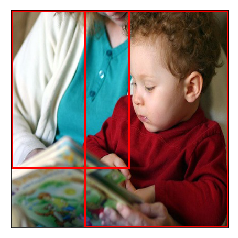

(416, 416, 3)
['sheep']
181 287 207 322


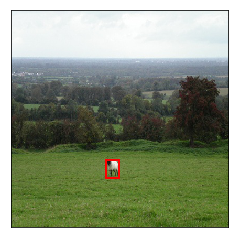

(416, 416, 3)
['cow']
103 221 245 346


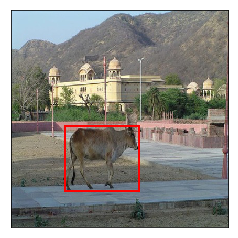

(416, 416, 3)


In [6]:
def plot_image(sample_image, sample_roi, sample_cls):    
    
    im = np.array(Image.open(sample_image), dtype=np.uint8)
    fix, ax = plt.subplots()
    ax.imshow(im)
    for i in range(sample_roi.shape[0]):
        x = sample_roi[i][0]
        y = sample_roi[i][1]
        x_max, y_max = sample_roi[i][2], sample_roi[i][3]
        print(x, y, x_max, y_max)
        rect = patches.Rectangle((x, y), (x_max - x), (y_max - y), linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.show()
    print(im.shape)
    
    
for j in range(0, 20):
    sample_img_loc = img_loc[j]
    sample_roi = roi[j]
    sample_cls = cls[j]
    print(sample_cls)
    plot_image(sample_img_loc, sample_roi, sample_cls)

In [7]:
output_tensor = np.zeros((13, 13, 5*25), dtype=np.float32)

In [8]:
output_tensor.shape

(13, 13, 125)

339 39 399 209
111 130 263 385
14 203 177 416


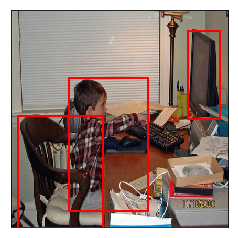

(416, 416, 3)
(208, 208)


In [17]:
sample_img_loc = img_loc[1]
sample_roi = roi[1]
sample_cls = cls[1]
plot_image(sample_img_loc, sample_roi, sample_cls)
img_mid = (int(416/2), int(416/2))
print(img_mid)

339 39 399 209
111 130 263 385
14 203 177 416


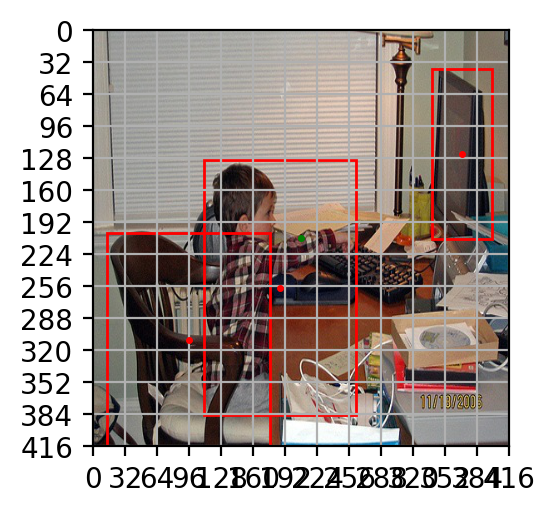

In [32]:
def plot_grid():
    image = Image.open(sample_img_loc)
    my_dpi=200.
    mid_img = (np.int(416/2), np.int(416/2))
    fig=plt.figure(figsize=(float(image.size[0])/my_dpi,float(image.size[1])/my_dpi),dpi=my_dpi)
    ax=fig.add_subplot(111)
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

    myInterval=32
    loc = plticker.MultipleLocator(base=myInterval)
    ax.xaxis.set_major_locator(loc)
    ax.yaxis.set_major_locator(loc)
    ax.grid(which='major', axis='both', linestyle='-')
    
    for i in range(sample_roi.shape[0]):
        x = sample_roi[i][0]
        y = sample_roi[i][1]
        x_max, y_max = sample_roi[i][2], sample_roi[i][3]
        mid_ = (x+((x_max - x)/2), y+((y_max - y)/2))
        print(x, y, x_max, y_max)
        rect = patches.Rectangle((x, y), (x_max - x), (y_max - y), linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.plot(mid_[0], mid_[1], color='red', marker='o', linestyle='dashed',
        linewidth=2, markersize=1.5)

    plt.plot(mid_img[0], mid_img[1], color='green', marker='o', linestyle='dashed',
        linewidth=2, markersize=1.5)
    ax.imshow(image)

plot_grid()


In [45]:
a_s = []
b_s = []
for i in range(sample_roi.shape[0]):
    
    x = sample_roi[i][0]
    y = sample_roi[i][1]
    x_max, y_max = sample_roi[i][2], sample_roi[i][3]
    mid_ = (x+((x_max - x)/2), y+((y_max - y)/2))
    
    for i in range(13):
        min_g = i*32
        max_g = min_g + 32
        
        if mid_[0] > min_g and mid_[0] < max_g:
            a_s.append(i+1)
    for i in range(13):
        min_g = i*32
        max_g = min_g + 32
        if mid_[1] > min_g and mid_[1] < max_g:
            b_s.append(i+1) 
        
print(a_s)
print(b_s)

[12, 6, 3]
[4, 9, 10]


In [ ]:
0.57273 0.677385
1.87446 2.06253
3.33843 5.47434
7.88282 3.52778
9.77052 9.16828